## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### 1. Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm


%matplotlib inline

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.546518  , 0.57740287, 0.04354708],
       [0.39290046, 0.58130063, 0.22196659],
       [0.13393897, 0.47043338, 0.12126343],
       [0.63755107, 0.0390025 , 0.86564088],
       [0.55371999, 0.55830079, 0.26899487]])

In [3]:
print(f"Размеры: {a.shape}")

Размеры: (5, 3)


In [4]:
print(f"Добавили 5:\n{a + 5}")

Добавили 5:
[[5.31721365 5.81830552 5.01450186]
 [5.46456415 5.48267476 5.23064224]
 [5.90863006 5.75498753 5.63056075]
 [5.48890647 5.29264216 5.31520869]
 [5.95364588 5.70457033 5.42268938]]


In [5]:
print(f"Посчитали произведение X X^T:\n{a @ a.T}")

Посчитали произведение X X^T:
[[0.77045873 0.54568625 0.91518462 0.39912961 0.88519306]
 [0.54568625 0.50199062 0.93196432 0.44107984 0.88059803]
 [0.91518462 0.93196432 1.79322161 0.86393452 1.66498445]
 [0.39912961 0.44107984 0.86393452 0.42402549 0.80566599]
 [0.88519306 0.88059803 1.66498445 0.80566599 1.58452612]]


In [6]:
print(f"Среднее по колонкам:\n{a.mean(axis=-1)}")

Среднее по колонкам:
[0.38334034 0.39262705 0.76472611 0.36558577 0.69363519]


In [7]:
print(f"Изменили размеры: {a.reshape(3, 5).shape}")

Изменили размеры: (3, 5)


Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [8]:
x = torch.rand(5, 3)
x

tensor([[0.9341, 0.1717, 0.5515],
        [0.2624, 0.8808, 0.2572],
        [0.8036, 0.5687, 0.3231],
        [0.2628, 0.5910, 0.4980],
        [0.4129, 0.8588, 0.6815]])

In [9]:
print(f"Размеры: {x.shape}")

Размеры: torch.Size([5, 3])


In [10]:
print(f"Добавили 5:\n{x + 5}")

Добавили 5:
tensor([[5.9341, 5.1717, 5.5515],
        [5.2624, 5.8808, 5.2572],
        [5.8036, 5.5687, 5.3231],
        [5.2628, 5.5910, 5.4980],
        [5.4129, 5.8588, 5.6815]])


In [11]:
# для перемножения тензоров высокой размерности читайте документацию по различным вариантам:
# torch.mm, torch.matmul, torch.bmm, @
print(f"X X^T  (1):\n{torch.matmul(x, x.transpose(1, 0))}\n")
print(f"X X^T  (2):\n{x.mm(x.t())}")

X X^T  (1):
tensor([[1.2061, 0.5382, 1.0265, 0.6216, 0.9090],
        [0.5382, 0.9108, 0.7949, 0.7176, 1.0401],
        [1.0265, 0.7949, 1.0737, 0.7082, 1.0404],
        [0.6216, 0.7176, 0.7082, 0.6663, 0.9554],
        [0.9090, 1.0401, 1.0404, 0.9554, 1.3725]])

X X^T  (2):
tensor([[1.2061, 0.5382, 1.0265, 0.6216, 0.9090],
        [0.5382, 0.9108, 0.7949, 0.7176, 1.0401],
        [1.0265, 0.7949, 1.0737, 0.7082, 1.0404],
        [0.6216, 0.7176, 0.7082, 0.6663, 0.9554],
        [0.9090, 1.0401, 1.0404, 0.9554, 1.3725]])


In [12]:
print(f"Среднее по колонкам:\n{x.mean(dim=-1)}")

Среднее по колонкам:
tensor([0.5524, 0.4668, 0.5651, 0.4506, 0.6511])


In [13]:
print(f"Изменили размеры:\n{x.view([3, 5]).shape}\n")

# будьте внимательны и не используйте view для транспонирования осей
print(f"По-другому изменили размеры:\n{x.view_as(x.t()).shape}\n")
print(f"Но не транспонировали!\n{x.view_as(x.t()) == x.t()}")

Изменили размеры:
torch.Size([3, 5])

По-другому изменили размеры:
torch.Size([3, 5])

Но не транспонировали!
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])


Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


### 2. Создаем тензоры в pytorch и снова изучаем базовые операции

In [14]:
x = torch.empty(5, 3)  # пустой тензор
print(x)

tensor([[ 0.0000e+00,  4.6566e-10,  0.0000e+00],
        [ 4.6566e-10,  3.0245e+35,  1.4153e-43],
        [ 1.0562e-38,  3.4438e-41,  2.9147e-43],
        [ 0.0000e+00, -5.8836e+14,  4.5800e-41],
        [-2.6515e-38,  4.5800e-41,  0.0000e+00]])


In [15]:
x = torch.rand(5, 3)  # случайный тензор
print(x)

tensor([[0.8500, 0.2199, 0.0321],
        [0.8363, 0.9648, 0.1909],
        [0.5133, 0.3979, 0.6011],
        [0.8873, 0.8633, 0.5638],
        [0.4944, 0.5594, 0.0279]])


In [16]:
x = torch.zeros(5, 3, dtype=torch.float32)  # тензор с нулями и указанием типов чисел
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [17]:
x = torch.tensor([5.5, 3])  # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [18]:
x1 = x.new_ones(5, 3, dtype=torch.double)  # используем уже созданный тензор для создания тензора из единичек
print(x, x.size()) 

tensor([5.5000, 3.0000]) torch.Size([2])


In [19]:
x = torch.randn_like(x1, dtype=torch.float)  # создаем случайный тензор с размерами x
print(x, x.size())

tensor([[-0.7101,  0.1116,  0.8223],
        [-1.1132, -0.1211,  2.2035],
        [ 0.0493, -0.2566,  1.0694],
        [-0.1828, -0.1145,  0.8236],
        [-0.5935, -0.0419,  1.5377]]) torch.Size([5, 3])


In [20]:
y = torch.rand(5, 3)
print(x + y)  # операция сложения

tensor([[-0.6884,  0.8789,  1.7236],
        [-0.7366,  0.3910,  2.9020],
        [ 0.1575, -0.0344,  1.2201],
        [ 0.1137,  0.6072,  1.0551],
        [-0.5093,  0.3502,  2.3959]])


In [21]:
z = torch.add(x, y)  # очередная операция сложения
print(z)

tensor([[-0.6884,  0.8789,  1.7236],
        [-0.7366,  0.3910,  2.9020],
        [ 0.1575, -0.0344,  1.2201],
        [ 0.1137,  0.6072,  1.0551],
        [-0.5093,  0.3502,  2.3959]])


In [22]:
torch.add(x, y, out=z)  # и наконец последний вид
print(z)

tensor([[-0.6884,  0.8789,  1.7236],
        [-0.7366,  0.3910,  2.9020],
        [ 0.1575, -0.0344,  1.2201],
        [ 0.1137,  0.6072,  1.0551],
        [-0.5093,  0.3502,  2.3959]])


In [23]:
print(x * y)  # поэлементное умножение

tensor([[-0.0154,  0.0856,  0.7412],
        [-0.4192, -0.0620,  1.5390],
        [ 0.0053, -0.0570,  0.1612],
        [-0.0542, -0.0826,  0.1906],
        [-0.0500, -0.0164,  1.3196]])


In [24]:
print(x @ y.t())  # матричное умножение

tensor([[0.8114, 0.3641, 0.0719, 0.0604, 0.6896],
        [1.8691, 1.0578, 0.1848, 0.0926, 1.7498],
        [0.7681, 0.6340, 0.1095, 0.0770, 0.8213],
        [0.6506, 0.4478, 0.0789, 0.0538, 0.6466],
        [1.3410, 0.8290, 0.1583, 0.1497, 1.2533]])


In [25]:
print(x.mm(y.t()))  # и опять матричное умножение

tensor([[0.8114, 0.3641, 0.0719, 0.0604, 0.6896],
        [1.8691, 1.0578, 0.1848, 0.0926, 1.7498],
        [0.7681, 0.6340, 0.1095, 0.0770, 0.8213],
        [0.6506, 0.4478, 0.0789, 0.0538, 0.6466],
        [1.3410, 0.8290, 0.1583, 0.1497, 1.2533]])


In [26]:
x, x.shape

(tensor([[-0.7101,  0.1116,  0.8223],
         [-1.1132, -0.1211,  2.2035],
         [ 0.0493, -0.2566,  1.0694],
         [-0.1828, -0.1145,  0.8236],
         [-0.5935, -0.0419,  1.5377]]),
 torch.Size([5, 3]))

In [27]:
print(x.unsqueeze(0).shape)  # добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [28]:
print(x.unsqueeze(0).unsqueeze(1).squeeze().shape)  # убрали измерение в начале

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [29]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### 3. Работаем с градиентами руками

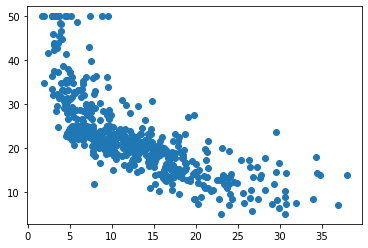

In [30]:
import pandas as pd
import numpy as np

# загрузка датасета Бостон (убран из sklearn'а)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

plt.scatter(data[:, -1], target);

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [31]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data[:,-1] / data[:,-1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [32]:
y_pred = w * x + b                    # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y) ** 2)  # совершаем операции с тензорами
loss.backward()                       # считаем градиенты

In [33]:
# сделали операции и посчитали градиенты, значение должно было появится
assert w.grad is not None
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-11.9597])
dL/db = 
 tensor([-43.6629])


In [221]:
# мега-пример того, как торч умеет считать градиенты
a = torch.tensor(2.)
a.requires_grad_()
b = a**2* 3

b.backward()
a.grad

tensor(12.)

__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [34]:
w.data

tensor([0.6171])

**Обучение линейной модели через PyTorch**

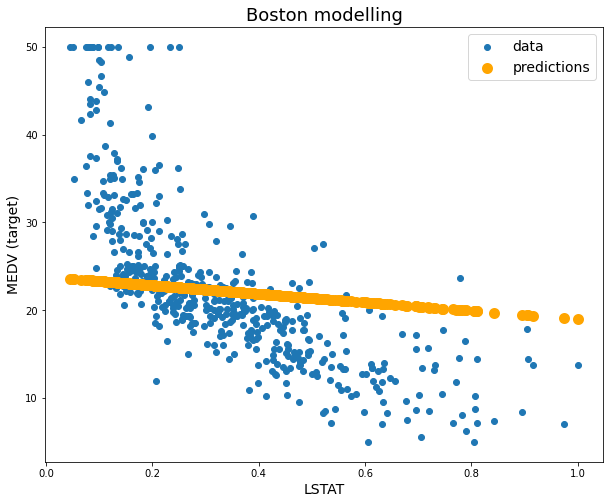

loss =  73.013245
Кривая предсказания: y = -4 * x + 23


In [35]:
from IPython.display import clear_output

w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

# обучение обычной линейной регрессии на 1м признаке
for i in range(100):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -=  0.05 * w.grad
    b.data -=  0.05 * b.grad 

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.01:
            print("Done!")
            break

print(f"Кривая предсказания: y = {int(w.data[0])} * x + {int(b.data[0])}")

**Обучение полиномиальной линейной модели через PyTorch**

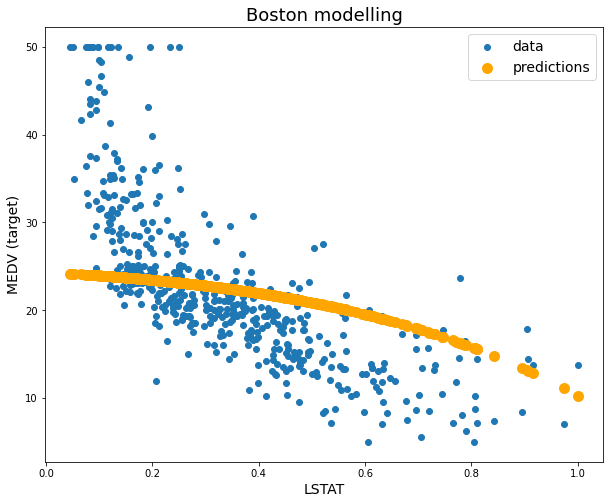

loss =  64.9561
Кривая предсказания: y = -2 * x^4 + -3 * x^3 + -5 * x^2 + -3 * x + -4


In [36]:
from IPython.display import clear_output

w4 = torch.rand(1, requires_grad=True)
w3 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)
w1 = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

# обучение полиномиальной линейной регрессии на 1м признаке
for i in range(100):
    y_pred = w4 * x**4 + w3 * x**3 + w2 * x**2 + w1 * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w4.data -=  0.05 * w4.grad
    w3.data -=  0.05 * w3.grad
    w2.data -=  0.05 * w2.grad
    w1.data -=  0.05 * w1.grad
    b.data -=  0.05 * b.grad 

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w4.grad.data.zero_()
    w3.grad.data.zero_()
    w2.grad.data.zero_()
    w1.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.01:
            print("Done!")
            break

print(f"Кривая предсказания: y = {int(w4.data[0])} * x^4 + {int(w3.data[0])} * x^3 + {int(w2.data[0])} * x^2 + {int(w1.data[0])} * x + {int(w.data[0])}")

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [4]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [5]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [6]:
our_dataset = RandomDataset(x, y)

In [7]:
our_dataset.__getitem__(0)

{'sample': tensor([0.8904, 0.5579, 0.8289, 0.9233, 0.2064]),
 'target': 0.5829998049530659}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [8]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [9]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.8904, 0.5579, 0.8289, 0.9233, 0.2064],
        [0.9815, 0.6781, 0.9273, 0.8605, 0.6828],
        [0.5413, 0.5179, 0.9215, 0.2560, 0.8607],
        [0.0178, 0.7170, 0.2609, 0.1567, 0.4530]])
Target:
tensor([0.5830, 0.7581, 0.1217, 0.2838], dtype=torch.float64)


или же:

In [10]:
for batch in dataloader:
    print(
        batch['sample'],
        batch['target'],
        sep='\n'
    )
    break

tensor([[0.8904, 0.5579, 0.8289, 0.9233, 0.2064],
        [0.9815, 0.6781, 0.9273, 0.8605, 0.6828],
        [0.5413, 0.5179, 0.9215, 0.2560, 0.8607],
        [0.0178, 0.7170, 0.2609, 0.1567, 0.4530]])
tensor([0.5830, 0.7581, 0.1217, 0.2838], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [11]:
model = nn.Sequential()                   # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 10))  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())         # добавили функцию активации
model.add_module("l3", nn.Linear(10, 1))  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [12]:
y_pred = model(batch['sample']) # получили предсказания модели

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [14]:
# используем готовый класс от торча для загрузки данных для тренировки
import torchvision

mnist_train = torchvision.datasets.MNIST(
    "./data/datasets/", 
    train=True, 
    download=False, 
    transform=torchvision.transforms.ToTensor()
) 
mnist_val = torchvision.datasets.MNIST(
    "./data/datasets/",
    train=False, 
    download=False,
    transform=torchvision.transforms.ToTensor()
)

In [15]:
# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
) 

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
)

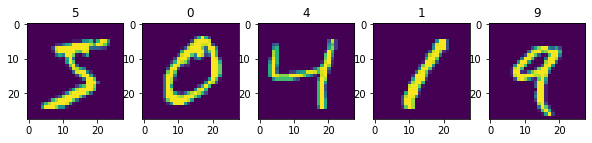

In [16]:
# посмотрим на то, с чем мы работаем

fig, axs = plt.subplots(ncols=5, figsize=(10,3))
for i in range(5):
    axs[i].imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    axs[i].set_title(str(mnist_train[i][1]))
plt.show()

In [17]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
    nn.Softmax(dim=-1)        # софтмакс для получения вероятностного распределения над метками класса
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 

Веса моделей хранятся в виде матриц и выглядят так:

In [18]:
# 2 слоя: на каждый матрица весов и вектор смещений
[(x[0], x[1].shape) for x in model.named_parameters()] 

[('1.weight', torch.Size([128, 784])),
 ('1.bias', torch.Size([128])),
 ('3.weight', torch.Size([10, 128])),
 ('3.bias', torch.Size([10]))]

_Красиво_ трекать метрики в полуавтоматическом режиме мы будем в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся(это того стоит):

In [101]:
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="hse_intro_dl_sem1")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [118]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров
        
    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
          
        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log({"mean val loss": np.mean(val_loss),
                   "mean val accuracy": np.mean(val_accuracy)})
        
        # печатаем метрики
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 1.540583610534668, accuracy: 0.9281


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 1.5125720500946045, accuracy: 0.9515


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 1.4986817836761475, accuracy: 0.9644


### Отличная точность сетки всего на 2х полносвязных слоях
Пример предсказания батча:

In [212]:
x_example, y_example = next(iter(val_dataloader))

In [213]:
x_example.shape # 4 матрицы 28х28 пикселей

torch.Size([4, 1, 28, 28])

In [214]:
y_example.data

tensor([5, 9, 4, 4])

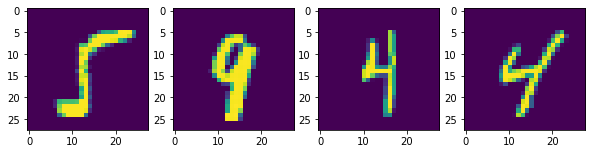

Predictions: [5, 9, 4, 4]


In [215]:
# визуализация данных на входе
fig, axs = plt.subplots(ncols=4, figsize=(10,3))
for i in range(4):
    axs[i].imshow(x_example[i].squeeze(0).numpy().reshape([28, 28]))
plt.show()

# подаем данные батча в сетку
print('Predictions:', torch.argmax(model(x_example), dim=1).tolist())

**Частая проблема CV при полносвяз слоях - неустойчивостьк сдвигам** \
=> требуется центрирование - не универсально

In [218]:
shift = 10
 
shifted = x_example.squeeze()[2]

shifted = torch.hstack((shifted, torch.zeros(28,shift)))[:,shift:]

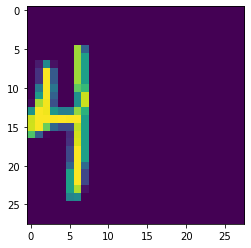

In [219]:
plt.imshow(shifted)

In [220]:
torch.argmax(model(shifted.unsqueeze(0)))

tensor(7)

### Дополнительные материалы:

* [PyTroch на простейшем примере с пояснениями](https://github.com/Kaixhin/grokking-pytorch)
* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)